x values:
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.1

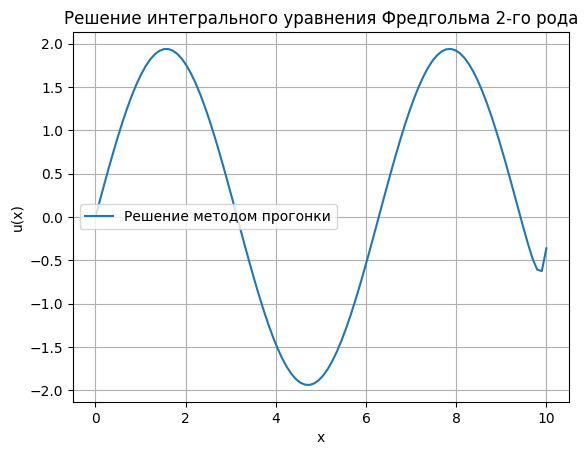

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Метод прогонки для тридиагональной системы
def tridiagonal_solver(a, b, c, d):
    """
    Решает систему линейных уравнений Ax = d для тридиагональной матрицы A.
    a, b, c - коэффициенты тридиагональной матрицы A, d - вектор правых частей.
    """
    n = len(d)
    alpha = np.zeros(n)
    beta = np.zeros(n)

    # Прямой ход прогонки
    alpha[0] = b[0]
    beta[0] = d[0] / alpha[0]

    for i in range(1, n):
        alpha[i] = b[i] - a[i-1] * c[i-1] / alpha[i-1]
        beta[i] = (d[i] - a[i-1] * beta[i-1]) / alpha[i]

    # Обратный ход прогонки
    x = np.zeros(n)
    x[-1] = beta[-1]

    for i in range(n-2, -1, -1):
        x[i] = beta[i] - c[i] * x[i+1] / alpha[i]

    return x

# Основная функция решения интегрального уравнения с методом прогонки
def solve_integral_equation(K, f, a, b, N, lambda_val):
    """
    Решает интегральное уравнение Фредгольма 2-го рода с использованием метода прогонки.

    K - ядро интеграла
    f - правая часть уравнения
    a, b - границы интеграла
    N - количество разбиений (дискретизация)
    lambda_val - параметр lambda
    """
    h = (b - a) / (N - 1)  # шаг
    x = np.linspace(a, b, N)  # сетка

    # Дискретизация правой части
    f_values = f(x)

    # Формируем коэффициенты для тридиагональной системы
    a_diag = np.zeros(N-1)  # Нижняя диагональ
    b_diag = np.zeros(N)    # Основная диагональ
    c_diag = np.zeros(N-1)  # Верхняя диагональ

    # Заполнение диагональных элементов
    for i in range(1, N-1):
        b_diag[i] = 1 + lambda_val * K(x[i], x[i])
        a_diag[i-1] = -lambda_val * K(x[i], x[i-1])
        c_diag[i] = -lambda_val * K(x[i], x[i+1])

    # Граничные значения для основной диагонали
    b_diag[0] = 1 + lambda_val * K(x[0], x[0])
    b_diag[-1] = 1 + lambda_val * K(x[-1], x[-1])

    # Преобразуем систему к виду Ax = f
    d = f_values.copy()

    # Решаем систему с помощью метода прогонки
    u = tridiagonal_solver(a_diag, b_diag, c_diag, d)

    return u, x

# Пример использования:
def K(x, t):
    """Пример ядра (гауссово ядро)"""
    return np.exp(-(x - t)**2)

def f(x):
    """Пример правой части уравнения"""
    return np.sin(x)

# Параметры задачи
a, b = 0, 10  # границы
N = 100  # количество узлов
lambda_val = 0.5  # параметр lambda

# Получаем решение
u, x = solve_integral_equation(K, f, a, b, N, lambda_val)

# Вывод числовых решений
print("x values:")
print(x)
print("u(x) values:")
print(u)

# Отображение решения на графике
plt.plot(x, u, label="Решение методом прогонки")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Решение интегрального уравнения Фредгольма 2-го рода")
plt.legend()
plt.grid(True)
plt.show()


Метод сходится за 81 итераций.
x values:
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.878787

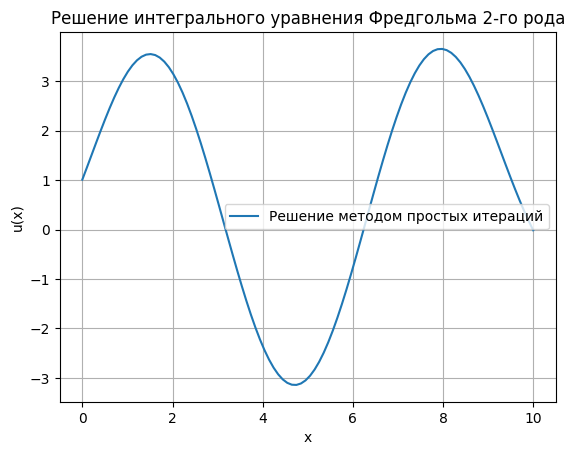

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Метод простых итераций для решения интегрального уравнения
def simple_iteration_solver(K, f, a, b, N, lambda_val, max_iter=100, tol=1e-6):
    """
    Решает интегральное уравнение Фредгольма 2-го рода с использованием метода простых итераций.

    K - ядро интеграла
    f - правая часть уравнения
    a, b - границы интеграла
    N - количество разбиений (дискретизация)
    lambda_val - параметр lambda
    max_iter - максимальное количество итераций
    tol - точность сходимости
    """
    h = (b - a) / (N - 1)  # шаг
    x = np.linspace(a, b, N)  # сетка

    # Дискретизация правой части
    f_values = f(x)

    # Инициализация приближения
    u = np.zeros(N)

    # Итерации метода простых итераций
    for k in range(max_iter):
        u_new = np.zeros(N)

        # Вычисление нового приближения для каждого узла
        for i in range(N):
            sum_term = 0
            for j in range(N):
                sum_term += K(x[i], x[j]) * u[j] * h  # интегрирование по сетке
            u_new[i] = f_values[i] + lambda_val * sum_term

        # Проверка на сходимость
        if np.linalg.norm(u_new - u, np.inf) < tol:
            print(f"Метод сходится за {k+1} итераций.")
            break

        u = u_new

    return u, x

# Пример использования:
def K(x, t):
    """Пример ядра (гауссово ядро)"""
    return np.exp(-(x - t)**2)

def f(x):
    """Пример правой части уравнения"""
    return np.sin(x)

# Параметры задачи
a, b = 0, 10  # границы
N = 100  # количество узлов
lambda_val = 0.5  # параметр lambda

# Получаем решение
u, x = simple_iteration_solver(K, f, a, b, N, lambda_val)

# Вывод числовых решений
print("x values:")
print(x)
print("u(x) values:")
print(u)

# Отображение решения на графике
plt.plot(x, u, label="Решение методом простых итераций")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Решение интегрального уравнения Фредгольма 2-го рода")
plt.legend()
plt.grid(True)
plt.show()


Метод сходится за 57 итераций.
x values:
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.878787

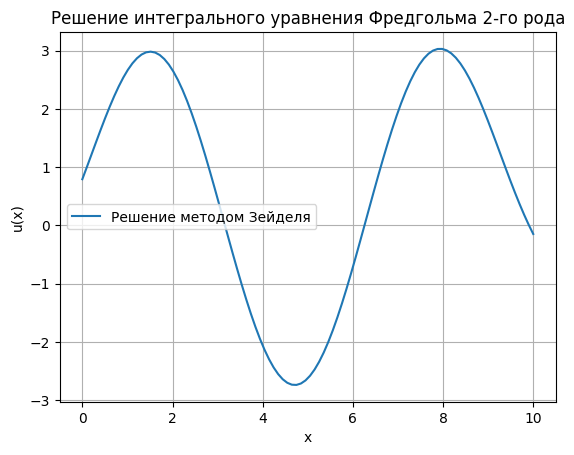

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Метод Зейделя для решения интегрального уравнения
def seidel_solver(K, f, a, b, N, lambda_val, max_iter=100, tol=1e-6):
    """
    Решает интегральное уравнение Фредгольма 2-го рода с использованием метода Зейделя.

    K - ядро интеграла
    f - правая часть уравнения
    a, b - границы интеграла
    N - количество разбиений (дискретизация)
    lambda_val - параметр lambda
    max_iter - максимальное количество итераций
    tol - точность сходимости
    """
    h = (b - a) / (N - 1)  # шаг
    x = np.linspace(a, b, N)  # сетка

    # Дискретизация правой части
    f_values = f(x)

    # Инициализация приближения
    u = np.zeros(N)

    # Итерации метода Зейделя
    for k in range(max_iter):
        u_new = u.copy()

        # Обновление приближений для каждого узла
        for i in range(N):
            sum_term = 0
            for j in range(N):
                if j != i:
                    sum_term += K(x[i], x[j]) * u[j] * h  # интегрирование по сетке
            u_new[i] = f_values[i] + lambda_val * sum_term

        # Проверка на сходимость
        if np.linalg.norm(u_new - u, np.inf) < tol:
            print(f"Метод сходится за {k+1} итераций.")
            break

        u = u_new

    return u, x

# Пример использования:
def K(x, t):
    """Пример ядра (гауссово ядро)"""
    return np.exp(-(x - t)**2)

def f(x):
    """Пример правой части уравнения"""
    return np.sin(x)

# Параметры задачи
a, b = 0, 10  # границы
N = 100  # количество узлов
lambda_val = 0.5  # параметр lambda

# Получаем решение
u, x = seidel_solver(K, f, a, b, N, lambda_val)

# Вывод числовых решений
print("x values:")
print(x)
print("u(x) values:")
print(u)

# Отображение решения на графике
plt.plot(x, u, label="Решение методом Зейделя")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Решение интегрального уравнения Фредгольма 2-го рода")
plt.legend()
plt.grid(True)
plt.show()


Метод сходится за 81 итераций.


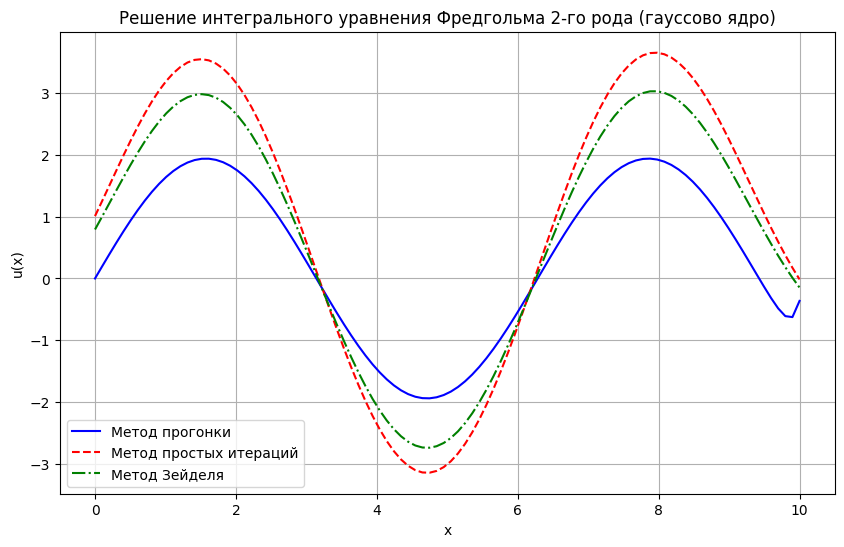

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Метод прогонки для тридиагональной системы
def tridiagonal_solver(a, b, c, d):
    n = len(d)
    alpha = np.zeros(n)
    beta = np.zeros(n)

    # Прямой ход прогонки
    alpha[0] = b[0]
    beta[0] = d[0] / alpha[0]

    for i in range(1, n):
        alpha[i] = b[i] - a[i-1] * c[i-1] / alpha[i-1]
        beta[i] = (d[i] - a[i-1] * beta[i-1]) / alpha[i]

    # Обратный ход прогонки
    x = np.zeros(n)
    x[-1] = beta[-1]

    for i in range(n-2, -1, -1):
        x[i] = beta[i] - c[i] * x[i+1] / alpha[i]

    return x

# Метод простых итераций для решения интегрального уравнения
def simple_iteration_solver(K, f, a, b, N, lambda_val, max_iter=100, tol=1e-6):
    h = (b - a) / (N - 1)
    x = np.linspace(a, b, N)
    f_values = f(x)
    u = np.zeros(N)

    for k in range(max_iter):
        u_new = np.zeros(N)
        for i in range(N):
            sum_term = 0
            for j in range(N):
                sum_term += K(x[i], x[j]) * u[j] * h
            u_new[i] = f_values[i] + lambda_val * sum_term

        if np.linalg.norm(u_new - u, np.inf) < tol:
            print(f"Метод сходится за {k+1} итераций.")
            break
        u = u_new

    return u, x

# Метод Зейделя для решения интегрального уравнения
def seidel_solver(K, f, a, b, N, lambda_val, max_iter=100, tol=1e-6):
    h = (b - a) / (N - 1)
    x = np.linspace(a, b, N)
    f_values = f(x)
    u = np.zeros(N)

    for k in range(max_iter):
        u_new = u.copy()
        for i in range(N):
            sum_term = 0
            for j in range(N):
                if j != i:
                    sum_term += K(x[i], x[j]) * u[j] * h
            u_new[i] = f_values[i] + lambda_val * sum_term

        if np.linalg.norm(u_new - u, np.inf) < tol:
            break
        u = u_new

    return u, x

# Гауссово ядро K(x, t)
def K_gaussian(x, t):
    return np.exp(-(x - t)**2)

# Правая часть f(x)
def f(x):
    return np.sin(x)  # Правая часть уравнения

# Параметры задачи
a, b = 0, 10  # Границы интервала
N = 100  # Количество узлов (разбиений)
lambda_val = 0.5  # Параметр lambda

# Получаем решение с методом прогонки
h = (b - a) / (N - 1)
x = np.linspace(a, b, N)
f_values = f(x)

# Заполнение коэффициентов для тридиагональной системы
a_diag = np.zeros(N-1)  # Нижняя диагональ
b_diag = np.zeros(N)    # Основная диагональ
c_diag = np.zeros(N-1)  # Верхняя диагональ

for i in range(1, N-1):
    b_diag[i] = 1 + lambda_val * K_gaussian(x[i], x[i])
    a_diag[i-1] = -lambda_val * K_gaussian(x[i], x[i-1])
    c_diag[i] = -lambda_val * K_gaussian(x[i], x[i+1])

# Граничные значения для основной диагонали
b_diag[0] = 1 + lambda_val * K_gaussian(x[0], x[0])
b_diag[-1] = 1 + lambda_val * K_gaussian(x[-1], x[-1])

# Преобразуем систему к виду Ax = f
d = f_values.copy()

# Решаем систему с помощью метода прогонки
u_prog = tridiagonal_solver(a_diag, b_diag, c_diag, d)

# Решение методом простых итераций
u_iter, x_iter = simple_iteration_solver(K_gaussian, f, a, b, N, lambda_val)

# Решение методом Зейделя
u_seidel, x_seidel = seidel_solver(K_gaussian, f, a, b, N, lambda_val)

# Отображение решения на графике
plt.figure(figsize=(10, 6))
plt.plot(x, u_prog, label="Метод прогонки", linestyle='-', color='b')
plt.plot(x_iter, u_iter, label="Метод простых итераций", linestyle='--', color='r')
plt.plot(x_seidel, u_seidel, label="Метод Зейделя", linestyle='-.', color='g')

plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Решение интегрального уравнения Фредгольма 2-го рода (гауссово ядро)")
plt.legend()
plt.grid(True)
plt.show()


Точность для sigma = 0.1: 1.813404e-01
Точность для sigma = 0.5: 9.037819e-01
Точность для sigma = 1.0: 9.598748e-01
Точность для sigma = 2.0: 9.745591e-01


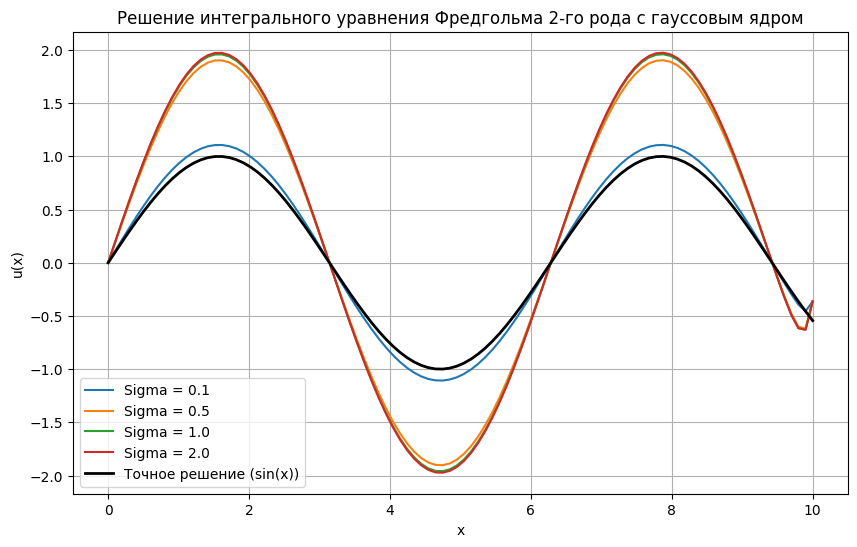

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Метод прогонки для тридиагональной системы
def tridiagonal_solver(a, b, c, d):
    n = len(d)
    alpha = np.zeros(n)
    beta = np.zeros(n)

    # Прямой ход прогонки
    alpha[0] = b[0]
    beta[0] = d[0] / alpha[0]

    for i in range(1, n):
        alpha[i] = b[i] - a[i-1] * c[i-1] / alpha[i-1]
        beta[i] = (d[i] - a[i-1] * beta[i-1]) / alpha[i]

    # Обратный ход прогонки
    x = np.zeros(n)
    x[-1] = beta[-1]

    for i in range(n-2, -1, -1):
        x[i] = beta[i] - c[i] * x[i+1] / alpha[i]

    return x

# Метод простых итераций для решения интегрального уравнения
def simple_iteration_solver(K, f, a, b, N, lambda_val, max_iter=100, tol=1e-6):
    h = (b - a) / (N - 1)
    x = np.linspace(a, b, N)
    f_values = f(x)
    u = np.zeros(N)

    for k in range(max_iter):
        u_new = np.zeros(N)
        for i in range(N):
            sum_term = 0
            for j in range(N):
                sum_term += K(x[i], x[j]) * u[j] * h
            u_new[i] = f_values[i] + lambda_val * sum_term

        if np.linalg.norm(u_new - u, np.inf) < tol:
            break
        u = u_new

    return u, x

# Метод Зейделя для решения интегрального уравнения
def seidel_solver(K, f, a, b, N, lambda_val, max_iter=100, tol=1e-6):
    h = (b - a) / (N - 1)
    x = np.linspace(a, b, N)
    f_values = f(x)
    u = np.zeros(N)

    for k in range(max_iter):
        u_new = u.copy()
        for i in range(N):
            sum_term = 0
            for j in range(N):
                if j != i:
                    sum_term += K(x[i], x[j]) * u[j] * h
            u_new[i] = f_values[i] + lambda_val * sum_term

        if np.linalg.norm(u_new - u, np.inf) < tol:
            break
        u = u_new

    return u, x

# Гауссово ядро с масштабом
def K_gaussian(x, t, sigma=1.0):
    return np.exp(-((x - t) ** 2) / (2 * sigma ** 2))  # Гауссово ядро

# Правая часть f(x)
def f(x):
    return np.sin(x)  # Например, правая часть синус

# Метод прогонки для интегрального уравнения
def solve_integral_equation(K, f, a, b, N, lambda_val, sigma):
    h = (b - a) / (N - 1)
    x = np.linspace(a, b, N)
    f_values = f(x)

    # Формируем коэффициенты для тридиагональной системы
    a_diag = np.zeros(N-1)
    b_diag = np.zeros(N)
    c_diag = np.zeros(N-1)

    # Заполнение диагональных элементов
    for i in range(1, N-1):
        b_diag[i] = 1 + lambda_val * K(x[i], x[i], sigma)
        a_diag[i-1] = -lambda_val * K(x[i], x[i-1], sigma)
        c_diag[i] = -lambda_val * K(x[i], x[i+1], sigma)

    # Граничные значения для основной диагонали
    b_diag[0] = 1 + lambda_val * K(x[0], x[0], sigma)
    b_diag[-1] = 1 + lambda_val * K(x[-1], x[-1], sigma)

    # Преобразуем систему к виду Ax = f
    d = f_values.copy()

    # Решаем систему с помощью метода прогонки
    u = tridiagonal_solver(a_diag, b_diag, c_diag, d)

    return u, x

# Параметры задачи
a, b = 0, 10  # границы
N = 100  # количество узлов
lambda_val = 0.5  # параметр lambda
sigma_values = [0.1, 0.5, 1.0, 2.0]  # Разные значения масштаба для гауссового ядра

# Получаем решения для разных значений sigma
solutions = {}
for sigma in sigma_values:
    u_prog, x = solve_integral_equation(K_gaussian, f, a, b, N, lambda_val, sigma)
    solutions[sigma] = u_prog

# Точное решение для сравнения (для примера, можно взять синус)
u_exact = f(x)

# Оценка точности для разных sigma
errors = {}
for sigma in sigma_values:
    error = np.linalg.norm(solutions[sigma] - u_exact, np.inf)
    errors[sigma] = error

# Вывод точности
for sigma in sigma_values:
    print(f"Точность для sigma = {sigma}: {errors[sigma]:.6e}")

# Отображение решения на графике для разных sigma
plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    plt.plot(x, solutions[sigma], label=f"Sigma = {sigma}")

plt.plot(x, u_exact, label="Точное решение (sin(x))", linestyle='-', color='k', linewidth=2)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Решение интегрального уравнения Фредгольма 2-го рода с гауссовым ядром")
plt.legend()
plt.grid(True)
plt.show()
